In [62]:
import numpy as np
from scipy.optimize import leastsq
from matplotlib import pyplot as plt

def lineFunc(x, p):
    '''
    p = (a, b)
    y = a*x + b
    '''
    return p[0]*x + p[1]

def consFunc(x, p):
    '''
    p = (a, )
    y = a
    '''
    return np.array([p[0]]*len(x))

def err(func):
    return lambda p, y, x : func(x, p) - y

def R2(func, y, x, p):
    return 1 - np.sum((func(x, p) - y)**2) / np.sum((y - np.mean(y))**2)

m = np.array([0, 10.63, 10.63, 114.78, 11.65, 2.62, 126.42, 117.40])
M = np.array([0, 4.77, 9.43, 14.17, 18.94, 23.71, 28.46])
g = 9.7940

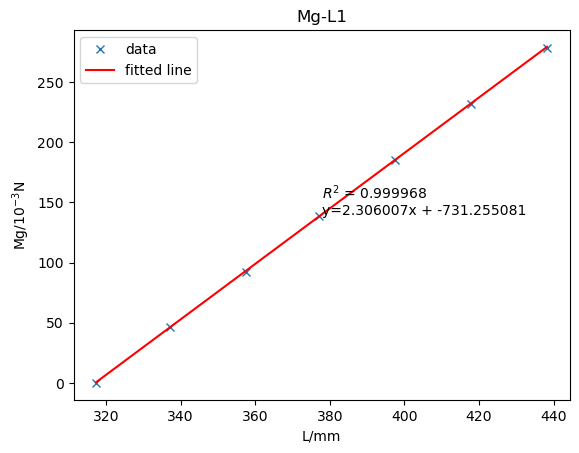

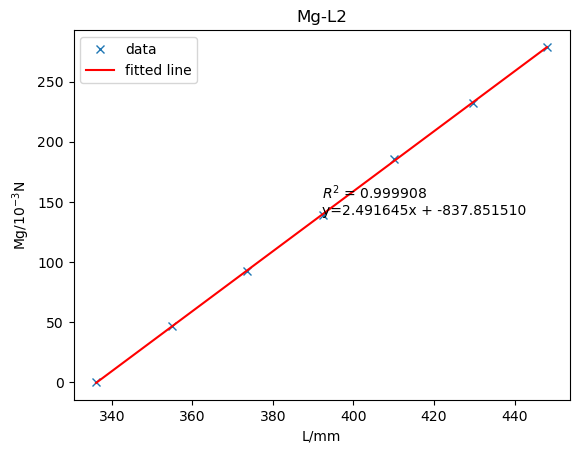

2.3060068377287033 2.491645422960522


In [63]:
def myfit(x, y, xlabel, ylabel, title):
    p0 = (0, )
    p, e = leastsq(err(consFunc), p0, args=(y, x))
    y_ = consFunc(x, p)
    plt.title(title)
    plt.plot(x, y, 'x', label='data')
    plt.plot(x, y_, 'r', label='fitted line')
    plt.text((max(x)+min(x))/2, (max(y)+min(y))/2, f'$\sigma^2$ = {np.var(y):.6f}\ny={p[0]:.6f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    return p

def myfit2(x, y, xlabel, ylabel, title):
    p0 = (0, 0)
    p, e = leastsq(err(lineFunc), p0, args=(y, x))
    y_ = lineFunc(x, p)
    plt.title(title)
    plt.plot(x, y, 'x', label='data')
    plt.plot(x, y_, 'r', label='fitted line')
    plt.text((max(x)+min(x))/2, (max(y)+min(y))/2, f'$R^2$ = {R2(lineFunc, y, x, p):.6f}\ny={p[0]:.6f}x + {p[1]:.6f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    return p

L1 = np.array([317.34, 337.06, 357.46, 377.07, 397.40, 417.74, 438.20])
k1 = myfit2(L1, M*g, 'L/mm', 'Mg/$10^{-3}$N', 'Mg-L1')[0]

L2 = np.array([336.08, 355.00, 373.58, 392.42, 410.00, 429.74, 448.06])
k2 = myfit2(L2, M*g, 'L/mm', 'Mg/$10^{-3}$N', 'Mg-L2')[0]
print(k1, k2)

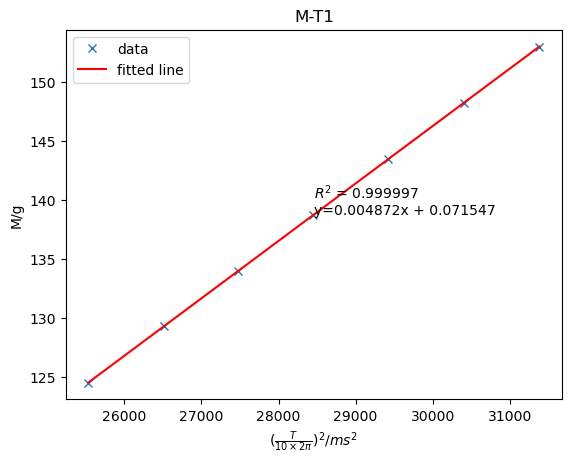

In [64]:
k = k1 + k2
T1 = np.array([10040.6, 10230.8, 10414.4, 10596.6, 10776.4, 10955.1, 11130.4])
k_ = myfit2((T1/(2*np.pi)/10)**2, m[7]+(m[1]+m[2])/3+M, r'$(\frac{T}{10\times 2\pi})^2/ms^2$', 'M/g', 'M-T1')[0]*10**3

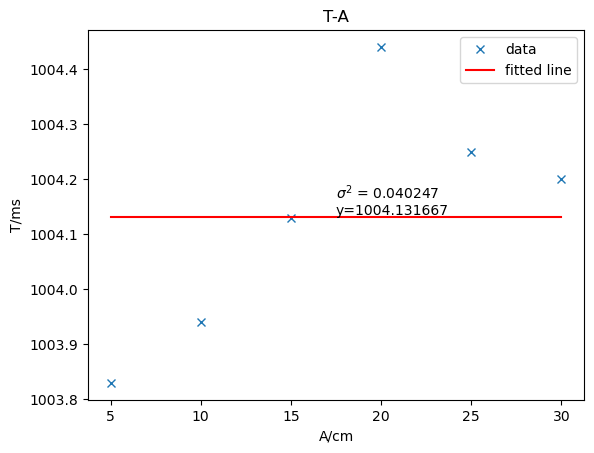

array([1004.13166667])

In [65]:
T2 = np.array([10038.3, 10039.4, 10041.3, 10044.4, 10042.5, 10042.0])
x10 = 70.20
x11 = np.array([75.20, 80.20, 85.20, 90.20, 95.20, 100.20])
myfit(x11-x10, T2/10, 'A/cm', 'T/ms', 'T-A')

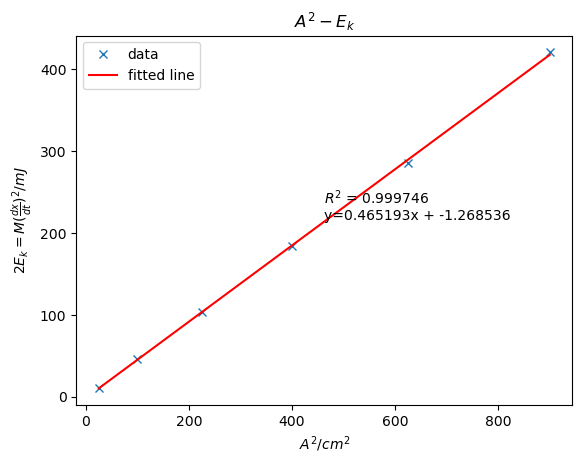

In [66]:
x20 = 70.60
x21 = np.array([75.60, 80.60, 85.60, 90.60, 95.60, 100.60])
dx = 10.01
T3 = np.array([34.52, 17.04, 11.37, 8.52, 6.85, 5.64])
k__ = myfit2((x21-x20)**2, (m[6]+(m[1]+m[2])/3)*(dx/T3)**2, r'$A^2/cm^2$', r'$2E_k = M(\frac{dx}{dt})^2/mJ$', r'$A^2-E_k$')[0]

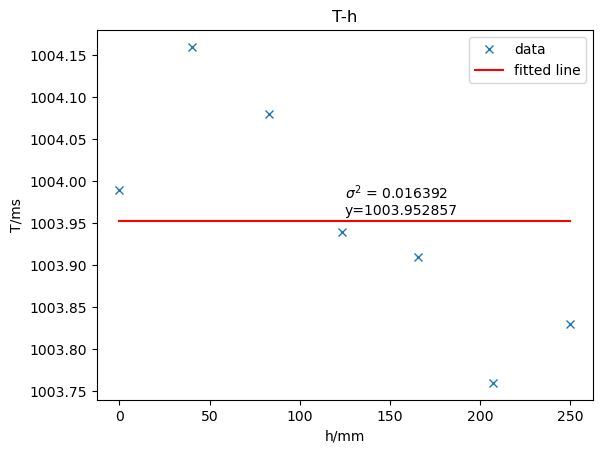

array([1003.95285714])

In [67]:
h = np.array([0.00, 40.00, 83.00, 123.60, 165.60, 207.00, 250.00])
T4 = np.array([10039.9, 10041.6, 10040.8, 10039.4, 10039.1, 10037.6, 10038.3])
myfit(h, T4/10, 'h/mm', 'T/ms', 'T-h')